### Import Required Libraries and Set Up Environment Variables

In [1]:
# Dependencies
import requests
import time
from dotenv import load_dotenv
import os
import pandas as pd
import json
import os
from datetime import datetime
## Load the NASA_API_KEY from the env file
load_dotenv()
NASA_API_KEY = os.getenv('NASA_API_KEY')

### CME Data

In [2]:
# Set the base URL to NASA's DONKI API:
base_url = "https://api.nasa.gov/DONKI/"

# Set the specifier for CMEs:
CME = "CME"

# Search for CMEs published between a begin and end date
startDate = "2013-05-01"
endDate   = "2024-05-01"


# Build URL for CME
url = f"{base_url}{CME}?startDate={startDate}&endDate={endDate}&api_key={NASA_API_KEY}"


In [3]:
# Make a "GET" request for the CME URL and store it in a variable named cme_response
cme_response = requests.get(base_url)

Error: 404 - <!DOCTYPE html>
<html>
  <head>
    <meta http-equiv="Content-type" content="text/html; charset=utf-8">
    <meta http-equiv="Content-Security-Policy" content="default-src 'none'; style-src 'unsafe-inline'; img-src data:; connect-src 'self'">
    <title>Page not found &middot; GitHub Pages</title>
    <style type="text/css" media="screen">
      body {
        background-color: #f1f1f1;
        margin: 0;
        font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
      }

      .container { margin: 50px auto 40px auto; width: 600px; text-align: center; }

      a { color: #4183c4; text-decoration: none; }
      a:hover { text-decoration: underline; }

      h1 { width: 800px; position:relative; left: -100px; letter-spacing: -1px; line-height: 60px; font-size: 60px; font-weight: 100; margin: 0px 0 50px 0; text-shadow: 0 1px 0 #fff; }
      p { color: rgba(0, 0, 0, 0.5); margin: 20px 0; line-height: 1.6; }

      ul { list-style: none; margin: 25px 0; padding: 0; }
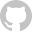
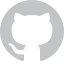

In [4]:
# Convert the response variable to json and store it as a variable named cme_json
if cme_response.status_code == 200:
    cme_json = cme_response.json()
    print(f"Successfully retrieved {len(cme_json)} CME records.")
else:
    print(f"Error: {cme_response.status_code} - {cme_response.text}")

In [12]:
# Preview the first result in JSON format
# Use json.dumps with argument indent=4 to format data
first_result = cme_json[0]



NameError: name 'cme_json' is not defined

In [13]:
# Convert cme_json to a Pandas DataFrame 
cme_json_df = pd.DataFrame(cme_response)
cme_json_df
# Keep only the columns: activityID, startTime, linkedEvents
cme_json_df = cme_json_df[['activityID', 'startTime', 'linkedEvents']]
print(cme_json_df)

KeyError: "None of [Index(['activityID', 'startTime', 'linkedEvents'], dtype='object')] are in the [columns]"

In [ ]:
# Notice that the linkedEvents column allows us to identify the corresponding GST
# Remove rows with missing 'linkedEvents' since we won't be able to assign these to GSTs


,activityID,startTime,linkedEvents
0,2013-05-01T03:12:00-CME-001,2013-05-01T03:12Z,[{'activityID': '2013-05-04T04:52:00-IPS-001'}]
4,2013-05-03T22:36:00-CME-001,2013-05-03T22:36Z,[{'activityID': '2013-05-07T04:37:00-IPS-001'}]
7,2013-05-09T19:29:00-CME-001,2013-05-09T19:29Z,[{'activityID': '2013-05-12T23:30:00-IPS-001'}]
10,2013-05-13T02:54:00-CME-001,2013-05-13T02:54Z,[{'activityID': '2013-05-13T01:53:00-FLR-001'}...
13,2013-05-13T16:18:00-CME-001,2013-05-13T16:18Z,[{'activityID': '2013-05-13T15:40:00-FLR-001'}...


In [ ]:
# Notice that the linkedEvents sometimes contains multiple events per row
# Write a nested for loop that iterates first over each row in the cme DataFrame (using the index)
# and then iterates over the values in 'linkedEvents' 
# and adds the elements individually to a list of dictionaries where each row is one element 

# Initialize an empty list to store the expanded rows


# Iterate over each index in the DataFrame

    # Iterate over each dictionary in the list
    
        # Append a new dictionary to the expanded_rows list for each dictionary item and corresponding 'activityID' and 'startTime' value
      
# Create a new DataFrame from the expanded rows


,activityID,startTime,linkedEvents
0,2013-05-01T03:12:00-CME-001,2013-05-01T03:12Z,{'activityID': '2013-05-04T04:52:00-IPS-001'}
1,2013-05-03T22:36:00-CME-001,2013-05-03T22:36Z,{'activityID': '2013-05-07T04:37:00-IPS-001'}
2,2013-05-09T19:29:00-CME-001,2013-05-09T19:29Z,{'activityID': '2013-05-12T23:30:00-IPS-001'}
3,2013-05-13T02:54:00-CME-001,2013-05-13T02:54Z,{'activityID': '2013-05-13T01:53:00-FLR-001'}
4,2013-05-13T02:54:00-CME-001,2013-05-13T02:54Z,{'activityID': '2013-05-13T04:12:00-SEP-001'}


In [ ]:
# Create a function called extract_activityID_from_dict that takes a dict as input such as in linkedEvents
# and verify below that it works as expected using one row from linkedEvents as an example
# Be sure to use a try and except block to handle errors

        # Log the error or print it for debugging




'2013-05-04T04:52:00-IPS-001'

In [ ]:
# Apply this function to each row in the 'linkedEvents' column (you can use apply() and a lambda function)
# and create a new column called 'GST_ActivityID' using loc indexer:


,activityID,startTime,linkedEvents,GST_ActivityID
0,2013-05-01T03:12:00-CME-001,2013-05-01T03:12Z,{'activityID': '2013-05-04T04:52:00-IPS-001'},2013-05-04T04:52:00-IPS-001
1,2013-05-03T22:36:00-CME-001,2013-05-03T22:36Z,{'activityID': '2013-05-07T04:37:00-IPS-001'},2013-05-07T04:37:00-IPS-001
2,2013-05-09T19:29:00-CME-001,2013-05-09T19:29Z,{'activityID': '2013-05-12T23:30:00-IPS-001'},2013-05-12T23:30:00-IPS-001
3,2013-05-13T02:54:00-CME-001,2013-05-13T02:54Z,{'activityID': '2013-05-13T01:53:00-FLR-001'},2013-05-13T01:53:00-FLR-001
4,2013-05-13T02:54:00-CME-001,2013-05-13T02:54Z,{'activityID': '2013-05-13T04:12:00-SEP-001'},2013-05-13T04:12:00-SEP-001


In [ ]:
# Remove rows with missing GST_ActivityID, since we can't assign them to GSTs:


In [ ]:
# print out the datatype of each column in this DataFrame:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   activityID      1807 non-null   object
 1   startTime       1807 non-null   object
 2   linkedEvents    1807 non-null   object
 3   GST_ActivityID  1807 non-null   object
dtypes: object(4)
memory usage: 56.6+ KB


In [ ]:
# Convert the 'GST_ActivityID' column to string format 

# Convert startTime to datetime format  

# Rename startTime to startTime_CME and activityID to cmeID

# Drop linkedEvents

# Verify that all steps were executed correctly


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   cmeID           1807 non-null   object             
 1   startTime_CME   1807 non-null   datetime64[ns, UTC]
 2   GST_ActivityID  1807 non-null   string             
dtypes: datetime64[ns, UTC](1), object(1), string(1)
memory usage: 42.5+ KB


In [ ]:
# We are only interested in CMEs related to GSTs so keep only rows where the GST_ActivityID column contains 'GST'
# use the method 'contains()' from the str library.  


,cmeID,startTime_CME,GST_ActivityID
21,2013-06-02T20:24:00-CME-001,2013-06-02 20:24:00+00:00,2013-06-07T03:00:00-GST-001
48,2013-09-29T22:40:00-CME-001,2013-09-29 22:40:00+00:00,2013-10-02T03:00:00-GST-001
90,2013-12-04T23:12:00-CME-001,2013-12-04 23:12:00+00:00,2013-12-08T00:00:00-GST-001
148,2014-02-16T14:15:00-CME-001,2014-02-16 14:15:00+00:00,2014-02-19T03:00:00-GST-001
151,2014-02-18T01:25:00-CME-001,2014-02-18 01:25:00+00:00,2014-02-20T03:00:00-GST-001


### GST Data

In [ ]:
# Set the base URL to NASA's DONKI API:
base_url = "https://api.nasa.gov/DONKI/"

# Set the specifier for Geomagnetic Storms (GST):
GST = "GST"

# Search for GSTs between a begin and end date
startDate = "2013-05-01"
endDate   = "2024-05-01"

# Build URL for GST


In [ ]:
# Make a "GET" request for the GST URL and store it in a variable named gst_response


In [ ]:
# Convert the response variable to json and store it as a variable named gst_json

# Preview the first result in JSON format
# Use json.dumps with argument indent=4 to format data


[
    {
        "gstID": "2013-06-01T01:00:00-GST-001",
        "startTime": "2013-06-01T01:00Z",
        "allKpIndex": [
            {
                "observedTime": "2013-06-01T01:00Z",
                "kpIndex": 6.0,
                "source": "NOAA"
            }
        ],
        "linkedEvents": [
            {
                "activityID": "2013-05-31T15:45:00-HSS-001"
            }
        ],
        "link": "https://webtools.ccmc.gsfc.nasa.gov/DONKI/view/GST/326/-1",
        "submissionTime": "2013-07-15T19:26Z"
    }
]


In [ ]:
# Convert gst_json to a Pandas DataFrame  

# Keep only the columns: activityID, startTime, linkedEvents


,gstID,startTime,linkedEvents
0,2013-06-01T01:00:00-GST-001,2013-06-01T01:00Z,[{'activityID': '2013-05-31T15:45:00-HSS-001'}]
1,2013-06-07T03:00:00-GST-001,2013-06-07T03:00Z,[{'activityID': '2013-06-02T20:24:00-CME-001'}]
2,2013-06-29T03:00:00-GST-001,2013-06-29T03:00Z,None
3,2013-10-02T03:00:00-GST-001,2013-10-02T03:00Z,[{'activityID': '2013-09-29T22:40:00-CME-001'}...
4,2013-12-08T00:00:00-GST-001,2013-12-08T00:00Z,[{'activityID': '2013-12-04T23:12:00-CME-001'}...


In [ ]:
# Notice that the linkedEvents column allows us to identify the corresponding CME
# Remove rows with missing 'linkedEvents' since we won't be able to assign these to CME


,gstID,startTime,linkedEvents
0,2013-06-01T01:00:00-GST-001,2013-06-01T01:00Z,[{'activityID': '2013-05-31T15:45:00-HSS-001'}]
1,2013-06-07T03:00:00-GST-001,2013-06-07T03:00Z,[{'activityID': '2013-06-02T20:24:00-CME-001'}]
3,2013-10-02T03:00:00-GST-001,2013-10-02T03:00Z,[{'activityID': '2013-09-29T22:40:00-CME-001'}...
4,2013-12-08T00:00:00-GST-001,2013-12-08T00:00Z,[{'activityID': '2013-12-04T23:12:00-CME-001'}...
5,2014-02-19T03:00:00-GST-001,2014-02-19T03:00Z,[{'activityID': '2014-02-16T14:15:00-CME-001'}...


In [ ]:
# Notice that the linkedEvents sometimes contains multiple events per row
# Use the explode method to ensure that each row is one element. Ensure to reset the index and drop missing values.


In [ ]:
# Apply the extract_activityID_from_dict function to each row in the 'linkedEvents' column (you can use apply() and a lambda function)
# and create a new column called 'CME_ActivityID' using loc indexer:

# Remove rows with missing CME_ActivityID, since we can't assign them to CMEs:


,gstID,startTime,linkedEvents,CME_ActivityID
0,2013-06-01T01:00:00-GST-001,2013-06-01T01:00Z,{'activityID': '2013-05-31T15:45:00-HSS-001'},2013-05-31T15:45:00-HSS-001
1,2013-06-07T03:00:00-GST-001,2013-06-07T03:00Z,{'activityID': '2013-06-02T20:24:00-CME-001'},2013-06-02T20:24:00-CME-001
2,2013-10-02T03:00:00-GST-001,2013-10-02T03:00Z,{'activityID': '2013-09-29T22:40:00-CME-001'},2013-09-29T22:40:00-CME-001
3,2013-10-02T03:00:00-GST-001,2013-10-02T03:00Z,{'activityID': '2013-10-02T01:54:00-IPS-001'},2013-10-02T01:54:00-IPS-001
4,2013-10-02T03:00:00-GST-001,2013-10-02T03:00Z,{'activityID': '2013-10-02T02:47:00-MPC-001'},2013-10-02T02:47:00-MPC-001


In [ ]:
# Convert the 'CME_ActivityID' column to string format 

# Convert the 'gstID' column to string format 

# Convert startTime to datetime format  

# Rename startTime to startTime_GST 

# Drop linkedEvents

# Verify that all steps were executed correctly


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   gstID           217 non-null    string             
 1   startTime_GST   217 non-null    datetime64[ns, UTC]
 2   CME_ActivityID  217 non-null    string             
dtypes: datetime64[ns, UTC](1), string(2)
memory usage: 5.2 KB


In [ ]:
# We are only interested in GSTs related to CMEs so keep only rows where the CME_ActivityID column contains 'CME'
# use the method 'contains()' from the str library.  


,gstID,startTime_GST,CME_ActivityID
1,2013-06-07T03:00:00-GST-001,2013-06-07 03:00:00+00:00,2013-06-02T20:24:00-CME-001
2,2013-10-02T03:00:00-GST-001,2013-10-02 03:00:00+00:00,2013-09-29T22:40:00-CME-001
5,2013-12-08T00:00:00-GST-001,2013-12-08 00:00:00+00:00,2013-12-04T23:12:00-CME-001
7,2014-02-19T03:00:00-GST-001,2014-02-19 03:00:00+00:00,2014-02-16T14:15:00-CME-001
9,2014-02-20T03:00:00-GST-001,2014-02-20 03:00:00+00:00,2014-02-18T01:25:00-CME-001


### Merge both datatsets

In [ ]:
# Now merge both datasets using 'gstID' and 'CME_ActivityID' for gst and 'GST_ActivityID' and 'cmeID' for cme. Use the 'left_on' and 'right_on' specifiers.


,gstID,startTime_GST,CME_ActivityID,cmeID,startTime_CME,GST_ActivityID
0,2013-06-07T03:00:00-GST-001,2013-06-07 03:00:00+00:00,2013-06-02T20:24:00-CME-001,2013-06-02T20:24:00-CME-001,2013-06-02 20:24:00+00:00,2013-06-07T03:00:00-GST-001
1,2013-10-02T03:00:00-GST-001,2013-10-02 03:00:00+00:00,2013-09-29T22:40:00-CME-001,2013-09-29T22:40:00-CME-001,2013-09-29 22:40:00+00:00,2013-10-02T03:00:00-GST-001
2,2013-12-08T00:00:00-GST-001,2013-12-08 00:00:00+00:00,2013-12-04T23:12:00-CME-001,2013-12-04T23:12:00-CME-001,2013-12-04 23:12:00+00:00,2013-12-08T00:00:00-GST-001
3,2014-02-19T03:00:00-GST-001,2014-02-19 03:00:00+00:00,2014-02-16T14:15:00-CME-001,2014-02-16T14:15:00-CME-001,2014-02-16 14:15:00+00:00,2014-02-19T03:00:00-GST-001
4,2014-02-20T03:00:00-GST-001,2014-02-20 03:00:00+00:00,2014-02-18T01:25:00-CME-001,2014-02-18T01:25:00-CME-001,2014-02-18 01:25:00+00:00,2014-02-20T03:00:00-GST-001


In [ ]:
# Verify that the new DataFrame has the same number of rows as cme and gst


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   gstID           67 non-null     string             
 1   startTime_GST   67 non-null     datetime64[ns, UTC]
 2   CME_ActivityID  67 non-null     object             
 3   cmeID           67 non-null     object             
 4   startTime_CME   67 non-null     datetime64[ns, UTC]
 5   GST_ActivityID  67 non-null     string             
dtypes: datetime64[ns, UTC](2), object(2), string(2)
memory usage: 3.3+ KB


### Computing the time it takes for a CME to cause a GST

In [ ]:
# Compute the time diff between startTime_GST and startTime_CME by creating a new column called `timeDiff`.


,gstID,startTime_GST,CME_ActivityID,cmeID,startTime_CME,GST_ActivityID,timeDiff
0,2013-06-07T03:00:00-GST-001,2013-06-07 03:00:00+00:00,2013-06-02T20:24:00-CME-001,2013-06-02T20:24:00-CME-001,2013-06-02 20:24:00+00:00,2013-06-07T03:00:00-GST-001,4 days 06:36:00
1,2013-10-02T03:00:00-GST-001,2013-10-02 03:00:00+00:00,2013-09-29T22:40:00-CME-001,2013-09-29T22:40:00-CME-001,2013-09-29 22:40:00+00:00,2013-10-02T03:00:00-GST-001,2 days 04:20:00
2,2013-12-08T00:00:00-GST-001,2013-12-08 00:00:00+00:00,2013-12-04T23:12:00-CME-001,2013-12-04T23:12:00-CME-001,2013-12-04 23:12:00+00:00,2013-12-08T00:00:00-GST-001,3 days 00:48:00
3,2014-02-19T03:00:00-GST-001,2014-02-19 03:00:00+00:00,2014-02-16T14:15:00-CME-001,2014-02-16T14:15:00-CME-001,2014-02-16 14:15:00+00:00,2014-02-19T03:00:00-GST-001,2 days 12:45:00
4,2014-02-20T03:00:00-GST-001,2014-02-20 03:00:00+00:00,2014-02-18T01:25:00-CME-001,2014-02-18T01:25:00-CME-001,2014-02-18 01:25:00+00:00,2014-02-20T03:00:00-GST-001,2 days 01:35:00


In [ ]:
# Use describe() to compute the mean and median time 
# that it takes for a CME to cause a GST. 


,timeDiff
count,67
mean,2 days 21:35:13.432835820
std,1 days 00:02:46.681279427
min,1 days 05:36:00
25%,2 days 03:12:00
50%,2 days 17:48:00
75%,3 days 12:17:00
max,6 days 03:00:00


### Exporting data in csv format

In [ ]:
# Export data to CSV without the index
